### Binary Variables

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
filterDf  = load_df('filterDf')
descDf = load_df('descDf')
types = get_var_types()

#### Variable List

In [ ]:
(
    descDf.filter("type = 'Categorical Binary'")
        .select(F.col('field').alias('Categorical Binary'))
        .show(20,False)
)

#### Statistics

In [3]:
# Categorical / Nominal Values
for f in types['binaryVars']:
  filterDf.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

+--------------------------+-----+
|assignment_late_submission|count|
+--------------------------+-----+
|false                     |80548|
+--------------------------+-----+

+------------------+-----+
|is_affecting_grade|count|
+------------------+-----+
|true              |77986|
|false             |2562 |
+------------------+-----+

+----------+-----+
|is_deleted|count|
+----------+-----+
|false     |80548|
+----------+-----+

+---------------+-----+
|is_force_scored|count|
+---------------+-----+
|false          |68018|
|true           |12530|
+---------------+-----+

+--------------------------+-----+
|is_manual_scoring_required|count|
+--------------------------+-----+
|false                     |80547|
|true                      |1    |
+--------------------------+-----+

+----------------------+-----+
|item_is_offline_scored|count|
+----------------------+-----+
|false                 |68102|
|true                  |12446|
+----------------------+-----+



Variables With Unary Values
- assignment_late_submission and is_deleted
- is_manual_scoring_required has only one true value
- Variables will be removed

#### Correlations Heatmap

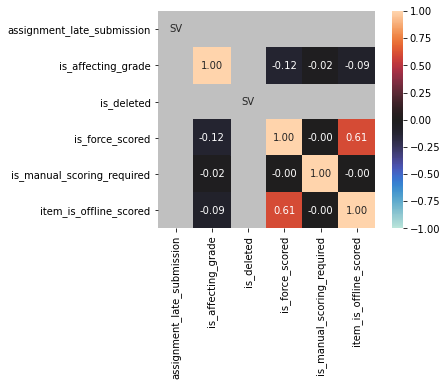

In [4]:
corr, ax = associations( filterDf.select(*types['binaryVars']).toPandas(), nan_replace_value='null' )

- No correlation
- Unary values in assignment_late_submission, is_manual_scoring_required and is_deleted
  - Remove unary values

In [5]:
add_todo("Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted")

##### Categorical / Nominal and Binary

###### Correlations Heatmap

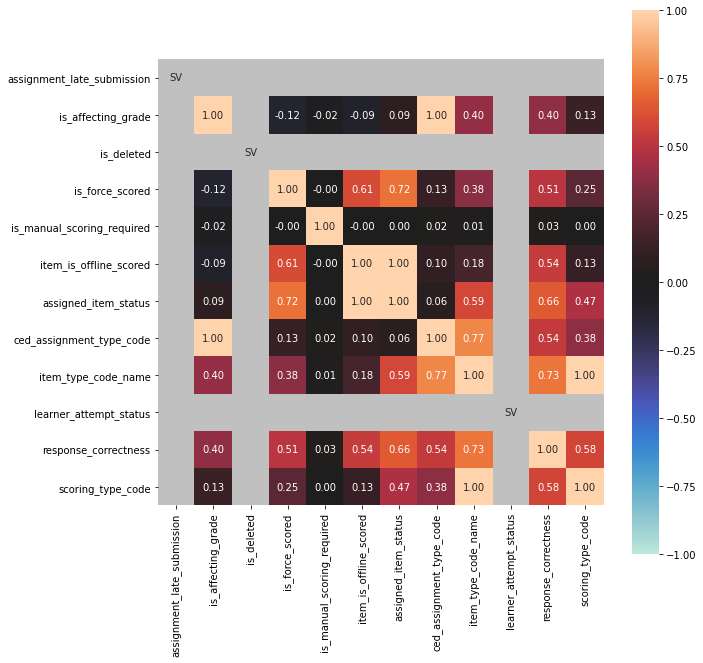

In [6]:
corr, ax = associations( filterDf.select(*types['binaryVars'], *types['nominalVars']).toPandas(), nan_replace_value='null', figsize=[10,10] )

- New correlations
  - is_affecting_grade and ced_assignment_type_code
  - item_is_offline_scored and assigned_item_status

###### Display is_affecting_grade and ced_assignment_type_code Correlation

In [7]:
def grade_to_code():
  dfPd = filterDf.select('is_affecting_grade','ced_assignment_type_code').toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")

grade_to_code()

ced_assignment_type_code,assessment,clo,game,practice,rubric,Total
is_affecting_grade,,,,,,
False,0,0,0,2562,0,2562
True,76172,248,1555,0,11,77986
Total,76172,248,1555,2562,11,80548


- is_affecting_grade = false when ced_assignment_type_code = practice

###### Display item_is_offline_scored and assigned_item_status Correlation

In [8]:
def offline_to_status():
  dfPd = filterDf.toPandas()
  return pd.crosstab(dfPd.item_is_offline_scored.fillna('null'), dfPd.assigned_item_status.fillna('null'), margins=True, margins_name="Total")

offline_to_status()

assigned_item_status,assigned,offline_scored,responded,scored,Total
item_is_offline_scored,,,,,
False,3264,0,34,64804,68102
True,0,12446,0,0,12446
Total,3264,12446,34,64804,80548


- item_is_offline_scored = True is always assigned_item_status = offline_scored